<img src='http://drive.google.com/uc?export=view&id=1ZhMMgLVVc2Tm79BanxAusgHB51pgC6iL'>

# <font color='lightblue'>Making Predictions</font>

In this project you will build a model to make predictions. This project will build on your exploritory data analyitic (EDA) skills. You may choose to use the datasets you used with project 1 or move to another dataset. 

In this project you will:

1.  Develop an understanding of the dataset
2.  Do exploritory data analysis and visualzation
3.  Do some data preprocessing
4.  Build a predictive model 
5.  Measure the performance of your model
6.  Summarize and interpret your results



**Action:** Import python libraries


In [1]:
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
import statsmodels.api as sm #for running regression!
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import numpy as np

In [6]:
pip install --upgrade pandas --user

     |████████████████████████████████| 11.5 MB 232 kB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas~=1.1.0; python_version >= "3.0", but you have pandas 1.3.1 which is incompatible.


In [5]:
pip install pyreadstat

## <font color='lightblue'>1. Data Understanding </font>

**Action:** Import your data into colaboratory.


Data set is the 2018 Canadian Internet Use Survey

Data set retrieved from https://abacus.library.ubc.ca/dataset.xhtml?persistentId=hdl:11272.1/AB2/KWDCXH

using the StatCan Open Data Source https://www23.statcan.gc.ca/imdb/p2SV.pl?Function=getInstanceList&Id=1196799

A lot of the data is already coded as float variables.


In [4]:
df_tech = pd.read_xml('/content/22100064_1.xml')

In [5]:
df_structure = pd.read_xml('/content/22100064_Structure.xml')

In [6]:
df_test = pd.read_spss('/content/cius_2018_en.sav')

**Action:** Determine the types of data are you dealing with & handle missing data (if there is any!). *Marks (0.5)*

In [3]:
df_tech.dtypes


ID               object
Test             object
Prepared         object
Sender          float64
Structure       float64
dataScope        object
type             object
structureRef     object
Series          float64
dtype: object

In [6]:
df_tech.head(5)

,ID,Test,Prepared,Sender,Structure,dataScope,type,structureRef,Series
0,DS1527298865467,false,2018-05-26T01:41:05,NaN,NaN,None,None,None,NaN
1,None,None,None,NaN,NaN,DataStructure,ns1:DataSetType,StatCan_DF_22100064_1_0,NaN


Clearly, df_tech is not the data set we want but just summary so we need to use df_test instead.


In [7]:
df_tech = df_test

In [13]:
df_tech.head(5)

,PUMFID,PROVINCE,LUC_RST,ABOSTAT,G_EDUC,HSDSIZEC,GENDER,AGE_GRP,HCOMP,LAN_Q01,EMP,DGI_Q05,BPR_Q16,AC_160A,AC_170A,AC_170B,AC_170C,AC_170E,AC_170F,AC_170G,AC_170H,AC_180A,AC_190A,AC_190B,AC_190C,AC_190D,AC_G190F,AC_G190I,AC_190J,AC_190K,AC_190L,AC_200A,AC_200B,AC_200C,AC_200D,AC_200E,AC_200F,AC_200G,AC_200H,UI_210A,...,WRPM961,WRPM962,WRPM963,WRPM964,WRPM965,WRPM966,WRPM967,WRPM968,WRPM969,WRPM970,WRPM971,WRPM972,WRPM973,WRPM974,WRPM975,WRPM976,WRPM977,WRPM978,WRPM979,WRPM980,WRPM981,WRPM982,WRPM983,WRPM984,WRPM985,WRPM986,WRPM987,WRPM988,WRPM989,WRPM990,WRPM991,WRPM992,WRPM993,WRPM994,WRPM995,WRPM996,WRPM997,WRPM998,WRPM999,WRPM1000
0,100000.0,48.0,1.0,3.0,2.0,1.0,2.0,03,3.0,1.0,1.0,3.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,4.0,...,5850.24859,2575.81186,4101.47780,2508.55762,6184.70528,2790.05878,0.0,2808.92815,0.00000,0.00000,0.00000,0.00000,2457.45374,0.00000,2235.92299,0.0,2217.71084,2206.77439,0.00000,4830.79859,6431.03620,0.0,0.00000,2266.55762,2156.35778,7149.30447,3415.20912,2873.47439,0.00000,2181.94038,0.00000,2278.03569,6043.52574,0.00000,2267.01329,2136.04619,2213.52209,5869.57769,2365.75576,0.00000
1,100001.0,47.0,2.0,3.0,1.0,1.0,1.0,05,3.0,1.0,1.0,3.0,2.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,0.00000,0.00000,0.00000,0.00000,840.39677,514.74834,0.0,546.36573,1496.13965,1930.70973,613.04946,0.00000,502.71999,615.25353,1105.91170,0.0,1961.58494,0.00000,1975.60766,588.58199,0.00000,0.0,0.00000,0.00000,587.36955,0.00000,0.00000,1352.36455,676.40579,893.75469,0.00000,449.22781,594.72037,871.92424,0.00000,1014.09571,519.42379,1138.34998,0.00000,0.00000
2,100002.0,24.0,1.0,3.0,3.0,1.0,1.0,05,3.0,3.0,1.0,3.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,3.0,3.0,1.0,3.0,1.0,3.0,3.0,2.0,...,0.00000,0.00000,0.00000,2788.67209,1339.67421,0.00000,0.0,0.00000,3485.37170,0.00000,0.00000,1362.72722,1367.92980,2503.97189,2618.80421,0.0,0.00000,0.00000,1230.27881,1294.42957,1397.63883,0.0,1430.16845,2637.27013,1304.13891,2505.71047,1325.76979,0.00000,2693.93332,2868.91185,3378.79949,0.00000,0.00000,3824.49238,0.00000,1561.69225,1340.06611,2433.46893,0.00000,0.00000
3,100003.0,35.0,1.0,3.0,2.0,2.0,2.0,04,2.0,1.0,1.0,3.0,1.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0,...,7365.33675,0.00000,4228.67584,0.00000,2055.80266,2301.29193,0.0,2502.22833,0.00000,0.00000,2448.01036,0.00000,0.00000,0.00000,2271.14542,0.0,4005.89485,2090.06373,6474.79504,0.00000,0.00000,0.0,2310.56654,6416.71260,2921.97122,2813.83465,2176.02883,0.00000,0.00000,7754.79640,0.00000,0.00000,2648.00651,2103.65635,2623.43870,2899.83892,4483.35935,7189.21065,2803.76127,2074.63095
4,100004.0,24.0,1.0,3.0,1.0,4.0,1.0,01,1.0,2.0,2.0,1.0,2.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,3.0,3.0,...,0.00000,12265.08729,0.00000,0.00000,6411.81007,26388.80775,0.0,8830.78209,0.00000,20211.86496,16877.77787,10323.04651,0.00000,0.00000,10004.61363,0.0,0.00000,8689.96397,0.00000,10946.55130,0.00000,0.0,30313.19806,15895.82531,0.00000,7318.18988,0.00000,7360.38168,9802.24075,0.00000,26880.90844,12635.60625,0.00000,0.00000,7351.51481,0.00000,0.00000,0.00000,13822.13229,19306.99591


In [5]:
df_structure.dtypes


ID                      object
Test                    object
Prepared                object
Sender                 float64
Receiver               float64
OrganisationSchemes    float64
Dataflows              float64
Codelists              float64
Concepts               float64
DataStructures         float64
dtype: object

In [52]:
df_test.dtypes

PUMFID      float64
PROVINCE    float64
LUC_RST     float64
ABOSTAT     float64
G_EDUC      float64
             ...   
WRPM996     float64
WRPM997     float64
WRPM998     float64
WRPM999     float64
WRPM1000    float64
Length: 1426, dtype: object

In [8]:
df_tech_datatypes = df_test.dtypes

In [9]:
df_tech.select_dtypes(exclude=['float64']).dtypes

AGE_GRP    object
dtype: object

In [10]:
df_tech.convert_dtypes(convert_floating=True)

,PUMFID,PROVINCE,LUC_RST,ABOSTAT,G_EDUC,HSDSIZEC,GENDER,AGE_GRP,HCOMP,LAN_Q01,EMP,DGI_Q05,BPR_Q16,AC_160A,AC_170A,AC_170B,AC_170C,AC_170E,AC_170F,AC_170G,AC_170H,AC_180A,AC_190A,AC_190B,AC_190C,AC_190D,AC_G190F,AC_G190I,AC_190J,AC_190K,AC_190L,AC_200A,AC_200B,AC_200C,AC_200D,AC_200E,AC_200F,AC_200G,AC_200H,UI_210A,...,WRPM961,WRPM962,WRPM963,WRPM964,WRPM965,WRPM966,WRPM967,WRPM968,WRPM969,WRPM970,WRPM971,WRPM972,WRPM973,WRPM974,WRPM975,WRPM976,WRPM977,WRPM978,WRPM979,WRPM980,WRPM981,WRPM982,WRPM983,WRPM984,WRPM985,WRPM986,WRPM987,WRPM988,WRPM989,WRPM990,WRPM991,WRPM992,WRPM993,WRPM994,WRPM995,WRPM996,WRPM997,WRPM998,WRPM999,WRPM1000
0,100000,48,1,3,2,1,2,03,3,1,1,3,2,1,6,6,6,6,6,6,6,1,6,6,6,6,6,6,6,6,6,3,3,3,3,1,1,1,3,4,...,5850.24859,2575.81186,4101.4778,2508.55762,6184.70528,2790.05878,0.0,2808.92815,0.0,0.0,0.0,0.0,2457.45374,0.0,2235.92299,0.0,2217.71084,2206.77439,0.0,4830.79859,6431.0362,0.0,0.0,2266.55762,2156.35778,7149.30447,3415.20912,2873.47439,0.0,2181.94038,0.0,2278.03569,6043.52574,0.0,2267.01329,2136.04619,2213.52209,5869.57769,2365.75576,0.0
1,100001,47,2,3,1,1,1,05,3,1,1,3,2,3,3,3,1,3,3,3,3,3,3,3,1,1,3,3,3,3,3,6,6,6,6,6,6,6,6,6,...,0.0,0.0,0.0,0.0,840.39677,514.74834,0.0,546.36573,1496.13965,1930.70973,613.04946,0.0,502.71999,615.25353,1105.9117,0.0,1961.58494,0.0,1975.60766,588.58199,0.0,0.0,0.0,0.0,587.36955,0.0,0.0,1352.36455,676.40579,893.75469,0.0,449.22781,594.72037,871.92424,0.0,1014.09571,519.42379,1138.34998,0.0,0.0
2,100002,24,1,3,3,1,1,05,3,3,1,3,2,1,6,6,6,6,6,6,6,1,6,6,6,6,6,6,6,6,6,1,3,3,1,3,1,3,3,2,...,0.0,0.0,0.0,2788.67209,1339.67421,0.0,0.0,0.0,3485.3717,0.0,0.0,1362.72722,1367.9298,2503.97189,2618.80421,0.0,0.0,0.0,1230.27881,1294.42957,1397.63883,0.0,1430.16845,2637.27013,1304.13891,2505.71047,1325.76979,0.0,2693.93332,2868.91185,3378.79949,0.0,0.0,3824.49238,0.0,1561.69225,1340.06611,2433.46893,0.0,0.0
3,100003,35,1,3,2,2,2,04,2,1,1,3,1,1,6,6,6,6,6,6,6,1,6,6,6,6,6,6,6,6,6,1,3,3,3,3,1,1,3,1,...,7365.33675,0.0,4228.67584,0.0,2055.80266,2301.29193,0.0,2502.22833,0.0,0.0,2448.01036,0.0,0.0,0.0,2271.14542,0.0,4005.89485,2090.06373,6474.79504,0.0,0.0,0.0,2310.56654,6416.7126,2921.97122,2813.83465,2176.02883,0.0,0.0,7754.7964,0.0,0.0,2648.00651,2103.65635,2623.4387,2899.83892,4483.35935,7189.21065,2803.76127,2074.63095
4,100004,24,1,3,1,4,1,01,1,2,2,1,2,1,6,6,6,6,6,6,6,1,6,6,6,6,6,6,6,6,6,3,3,1,3,1,1,1,3,3,...,0.0,12265.08729,0.0,0.0,6411.81007,26388.80775,0.0,8830.78209,0.0,20211.86496,16877.77787,10323.04651,0.0,0.0,10004.61363,0.0,0.0,8689.96397,0.0,10946.5513,0.0,0.0,30313.19806,15895.82531,0.0,7318.18988,0.0,7360.38168,9802.24075,0.0,26880.90844,12635.60625,0.0,0.0,7351.51481,0.0,0.0,0.0,13822.13229,19306.99591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13805,113805,13,2,3,1,2,1,06,2,2,2,3,2,1,6,6,6,6,6,6,6,1,6,6,6,6,6,6,6,6,6,3,3,3,3,3,1,3,3,1,...,0.0,217.39648,299.69681,424.50902,216.63815,0.0,549.95114,521.07755,767.42875,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,481.16549,457.99193,428.3226,162.20415,0.0,243.49539,595.41409,201.26662,525.59855,191.66475,217.53086,0.0,0.0,227.00291,641.3681,303.76868,0.0,202.27311,427.21207,0.0,0.0,0.0
13806,113806,46,1,3,3,4,1,03,1,1,1,3,1,1,6,6,6,6,6,6,6,1,6,6,6,6,6,6,6,6,6,1,3,3,1,3,1,1,3,4,...,2177.76288,0.0,2894.57281,2612.50402,2025.79989,0.0,0.0,1299.43523,2546.73111,1054.21839,0.0,0.0,0.0,0.0,1170.22665,956.39678,2263.90565,1041.44425,0.0,1247.4653,1121.57039,3850.04964,0.0,3799.20963,0.0,0.0,2165.75755,1103.19672,2111.73212,1955.1843,680.03797,961.41363,0.0,0.0,1040.43126,782.81894,2945.4905,1001.94961,4450.02172,0.0
13807,113807,24,2,3,2,1,1,04,3,3,1,3,2,1,6,6,6,6,6,6,6,1,6,6,6,6,6,6,6,6,6,1,3,1,3,3,1,3,3,1,...,997.40746,1041.74145,2354.80498,967.01459,1173.05661,3268.4776

In [11]:
df_tech = df_tech.apply(lambda AGE_GRP:pd.to_numeric(AGE_GRP, errors='coerce'))

In [68]:
df_tech.isna().sum()

PUMFID      0
PROVINCE    0
LUC_RST     0
ABOSTAT     0
G_EDUC      0
           ..
WRPM996     0
WRPM997     0
WRPM998     0
WRPM999     0
WRPM1000    0
Length: 1426, dtype: int64

In [69]:
df_tech.isna().sum().sum()


14

In [70]:
for i, x in enumerate(df_tech.isna().sum()):
  if x > 0:
    print(df_tech.iloc[[i]], x)

       PUMFID  PROVINCE  LUC_RST  ...  WRPM998     WRPM999    WRPM1000
473  100473.0      59.0      1.0  ...      0.0  5851.46166  1657.04951

[1 rows x 1426 columns] 1
       PUMFID  PROVINCE  LUC_RST  ...     WRPM998     WRPM999    WRPM1000
503  100503.0      59.0      1.0  ...  4843.41951  4261.99204  7573.73644

[1 rows x 1426 columns] 1
       PUMFID  PROVINCE  LUC_RST  ...  WRPM998     WRPM999  WRPM1000
582  100582.0      59.0      1.0  ...      0.0  6883.48312       0.0

[1 rows x 1426 columns] 1
       PUMFID  PROVINCE  LUC_RST  ...     WRPM998  WRPM999    WRPM1000
591  100591.0      35.0      1.0  ...  1989.38965      0.0  3806.93559

[1 rows x 1426 columns] 1
       PUMFID  PROVINCE  LUC_RST  ...    WRPM998  WRPM999  WRPM1000
663  100663.0      24.0      1.0  ...  781.35611      0.0       0.0

[1 rows x 1426 columns] 1
       PUMFID  PROVINCE  LUC_RST  ...  WRPM998     WRPM999  WRPM1000
684  100684.0      24.0      2.0  ...      0.0  2070.36007       0.0

[1 rows x 1426 colum

In [71]:
df_tech.columns[df_tech.isnull().any()]

Index(['WRPM48', 'WRPM78', 'WRPM157', 'WRPM166', 'WRPM238', 'WRPM259',
       'WRPM348', 'WRPM420', 'WRPM523', 'WRPM582', 'WRPM674', 'WRPM840',
       'WRPM934', 'WRPM977'],
      dtype='object')

In [72]:
len(df_tech)

13810

In [12]:
#drop rows if any column contain missing values
df_tech_nona = df_tech.dropna(how='any')

len(df_tech_nona)

13801

**Action:** Estimate the summary statistics of some of the key variables. *Marks (0.5)*

In [35]:
mean_age_group = df_tech_nona.AGE_GRP.mean()
mode_age = df_tech_nona.AGE_GRP.mode()

print('the mean age group is = ',mean_age_group) 
print('the most frequent age group is ',mode_age)
print('Given the coding, mean is ', end = '')
if 2.0 > mean_age_group > 1.0:
  print ('15 to 24 years')
elif 3.0 > mean_age_group > 2.0:
  print ('25 to 34 years')
elif 4.0 > mean_age_group > 3.0:
  print ('35 to 44 years')
elif 5.0 > mean_age_group > 4.0:
  print ('45 to 54 years')
elif 6.0 > mean_age_group > 5.0:
  print ('55 to 64 years')
elif mean_age_group > 6.0:
  print ('65 years and over')

print('Given the coding, mode is ', end = '')
if 2 > mode_age[0] > 1:
  print ('15 to 24 years')
elif 3 > mode_age[0] > 2:
  print ('25 to 34 years')
elif 4 > mode_age[0] > 3:
  print ('35 to 44 years')
elif 5 > mode_age[0] > 4:
  print ('45 to 54 years')
elif 6 > mode_age[0] > 5:
  print ('55 to 64 years')
else:
  print ('65 years and over')  

the mean age group is =  4.330410839794218
the most frequent age group is  0    6
dtype: int64
Given the coding, mean is 45 to 54 years
Given the coding, mode is 65 years and over


## <font color='lightblue'>2. Data Exploration and Visualization </font>

**Action:** Visualize 1- the distribution of values for some key variables, and 2- the relationships between key variables. Remember to add text that walks a reader through what you found. *Marks: 2*

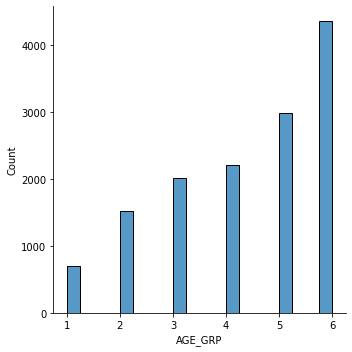

In [13]:
sns.displot(df_tech, x="AGE_GRP")

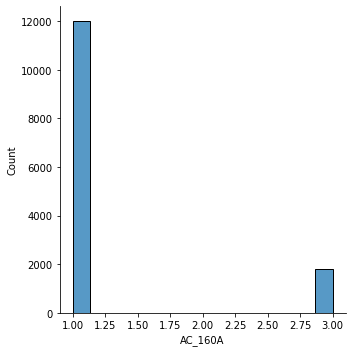

In [17]:
sns.displot(df_tech, x="AC_160A")

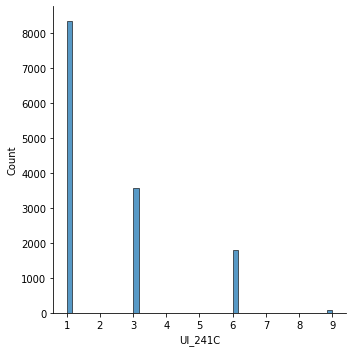

In [18]:
sns.displot(df_tech, x="UI_241C")

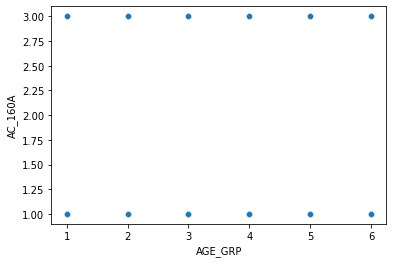

In [44]:
sns.scatterplot(data=df_tech,x="AGE_GRP", y="AC_160A")

This violin plot shows the relationship between age group, gender, and whether or not the respondent has used the Internet for personal use during the past three months. 

1.0 is No and 3.0 is Yes. 

Male is coded as 1.0 and female as 2.0.

The age groups are separated as 15 to 24 years, 25 to 34 years, 35 to 44 years, 45 to 54 years, 55 to 64 years, and 64 + years.


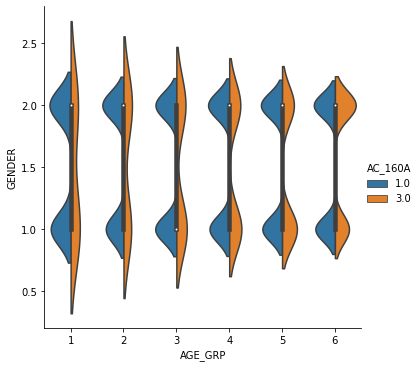

In [43]:
sns.catplot(data=df_tech, kind="violin", x="AGE_GRP", y="GENDER", hue="AC_160A", split=True)

There clearly appears to be a relationship that as age group is younger, there is more frequent use of the internet (the orange 3.0 no section of the plot is much smaller and thinner compared to the blue 1.0 yes section.


**Action:** Use correlation to estimate the relationship between some of the key variables. Remember to add text that helps a reader interpret the correlations. *Marks: 1* 

In [45]:
#estimate correlation internet use and age group
df_tech.AC_160A.corr(df_tech.AGE_GRP)

0.30209922035717207

In [48]:
#estimate correlation internet use and education
df_tech.AC_160A.corr(df_tech.G_EDUC)

-0.17362820512291383

In [49]:
#estimate correlation internet use and province
df_tech.AC_160A.corr(df_tech.PROVINCE)

-0.07879998947169722

In [52]:
#estimate correlation internet use and social networking websites or apps use (should be high bc the second was only asked to those who responded yes to AC_160A)
df_tech.AC_160A.corr(df_tech.UI_241C)

0.8202836852104962

In [51]:
#estimate correlation age group and social networking websites or apps use
df_tech.AGE_GRP.corr(df_tech.UI_241C)

0.40262569377567053

I ran a couple different correlations. It is definitely more difficult to work with categorical and/or variables already coded.



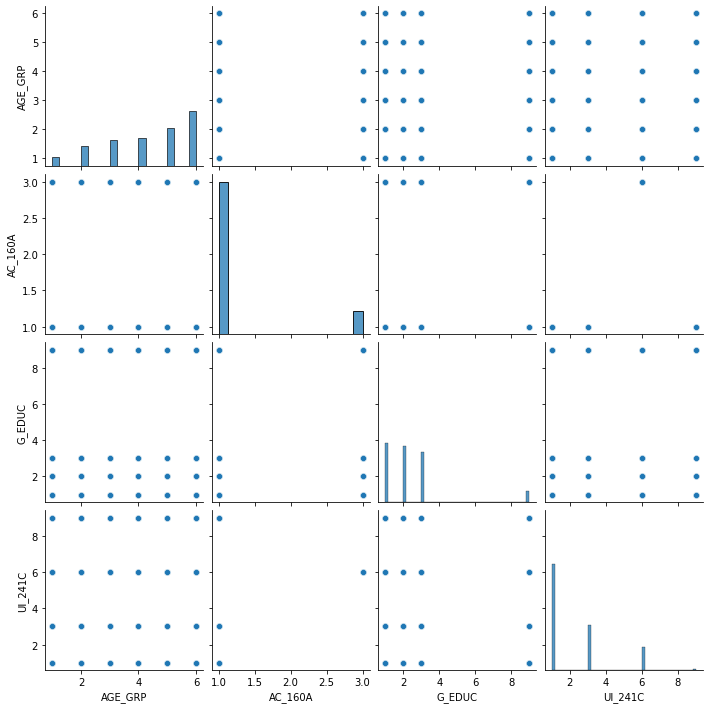

In [53]:
#looking at age group, internet use, education and social networking websites or apps use
df_tech_pairs = df_tech[["AGE_GRP","AC_160A","G_EDUC","UI_241C"]]

#pairplot method to look at all combinations of these variables
sns.pairplot(df_tech_pairs)

## <font color='lightblue'>3. Data preprocessing </font>

**Action:** Do you need to apply any preprocessing steps? E.g., convert a binary variable to 1/0, or use one-hot encoding to convert categorical variables? Apply at least one preprocessing step, and explain why you used it. *Marks: 2*

##Preprocessing for a linear regression:

In [13]:
#Convert Internet Social Media use to 0/1
from sklearn.preprocessing import OrdinalEncoder

#get the columns names of categorical features you'd like to turn into 0/1
tech_user = ['AC_160A']

#create a dataframe of those features
bin_features = df_tech[tech_user]

#fit the scaler to those data
bin_scaler = OrdinalEncoder().fit(bin_features.values)

#use the scaler to transform your data
bin_features = bin_scaler.transform(bin_features.values)

#put these scaled features back into your transformed features dataframe
df_tech[tech_user] = bin_features

#take a look
pd.set_option('max_columns', None)
df_tech.head(3)


,PUMFID,PROVINCE,LUC_RST,ABOSTAT,G_EDUC,HSDSIZEC,GENDER,AGE_GRP,HCOMP,LAN_Q01,EMP,DGI_Q05,BPR_Q16,AC_160A,AC_170A,AC_170B,AC_170C,AC_170E,AC_170F,AC_170G,AC_170H,AC_180A,AC_190A,AC_190B,AC_190C,AC_190D,AC_G190F,AC_G190I,AC_190J,AC_190K,AC_190L,AC_200A,AC_200B,AC_200C,AC_200D,AC_200E,AC_200F,AC_200G,AC_200H,UI_210A,UI_220A,UI_220B,UI_220C,UI_220D,UI_220E,UI_220F,UI_220G,UI_230A,UI_230B,UI_230C,UI_230D,UI_230E,UI_230F,UI_230G,UI_230H,UI_230I,UI_241A,UI_241B,UI_241C,UI_241D,UI_241E,UI_241F,UI_241G,UI_241H,UI_242A,UI_242B,UI_242C,UI_242D,UI_242E,UI_243A,UI_243B,UI_243C,UI_243D,UI_243E,UI_243F,UI_243G,UI_243H,UI_243I,UI_243J,UI_244A,UI_244B,UI_244C,UI_244D,UI_244E,UI_245A,UI_245B,UI_245C,UI_245D,UI_245E,UI_245F,UI_245G,UI_245H,UI_245I,UI_250A,UI_250B,UI_250C,UI_250D,UI_250E,UI_250F,UI_250G,UI_250H,UI_260A,SM_270A,SM_280A,SM_280B,SM_280C,SM_280E,SM_280F,SM_290A,SM_290B,SM_290C,SM_290D,SM_290E,SM_300A,SM_300B,SM_300C,SM_300D,SM_300E,SM_300F,SM_300G,SM_300H,SM_300I,SM_300J,SM_300K,SN_310A,SN_310B,SN_320A,SN_320B,SN_320C,SN_G320F,SN_320G,SN_330A,SN_330B,SN_330C,SN_330D,SN_330E,SN_330F,SN_330G,SN_330H,SN_340A,SN_340B,SN_340C,SN_340D,SN_340E,SN_340H,SN_340I,SN_G340J,SN_340K,SN_340L,GV_350A,GV_350B,GV_350C,GV_350D,GV_350E,GV_350F,GV_350G,GV_350H,GV_350I,GV_350J,GV_350K,GV_350L,GV_360A,GV_360B,GV_360C,GV_360D,GV_370A,GV_370B,GV_370C,GV_370D,GV_380A,GV_380B,GV_380C,GV_380D,GV_380E,GV_380F,GV_380G,GV_380H,GV_390A,GV_390B,GV_390D,GV_390F,GV_390G,GV_390H,GV_390I,CC_400A,CC_400B,CC_400C,CC_400D,CC_410A,CC_420A,CC_420B,CC_420C,CC_420D,CC_430A,CC_430B,CC_430C,CC_430D,CC_430E,SP_440A,SP_440B,SP_440C,SP_440D,SP_440E,SP_440F,SP_440G,SP_440H,SP_450A,SP_450B,SP_450C,SP_450D,SP_450E,SP_450F,SP_450G,SP_450H,SP_450I,SP_450J,SP_450K,SP_460A,SP_460B,SP_460C,SP_460D,SP_460E,SP_460F,SP_460G,SP_460H,SP_460I,SP_460J,SP_460K,SP_470A,SP_470B,SP_470C,SP_470D,SP_480A,SP_480B,SP_480C,SP_480D,DS_490A,DS_490B,DS_490C,DS_490D,DS_490E,DS_490F,DS_490G,DS_500A,DS_500B,DS_500C,DS_500D,DS_500E,DS_500F,DS_500G,DS_500H,DS_500I,DS_510A,DS_510B,DS_510C,DS_510D,DS_510E,DS_510F,DS_510G,DS_510H,DS_510I,DS_520A,DS_520B,DS_520C,DS_520D,DS_520E,DS_520F,DS_520G,DS_520H,EC_530A,EC_530B,EC_530C,EC_530D,EC_530E,EC_530F,EC_530G,EC_530H,EC_530I,EC_530J,EC_530K,EC_530L,EC_540A,EC_540B,EC_540C,EC_540D,EC_540E,EC_540F,EC_540G,EC_540H,EC_540I,EC_540J,EC_540K,EC_540X,EC_550A,EC_550B,EC_550C,EC_550D,EC_550E,EC_550F,EC_550G,EC_550H,EC_550I,EC_550J,EC_550K,EC_550L,EC_550M,EC_550N,EC_550O,EC_560A,EC_560B,EC_560C,EC_560D,EC_560E,EC_560F,EC_560G,EC_570A,EC_590A,EC_590B,EC_590C,EC_600A,EC_600B,EC_600C,EC_610A,EC_610B,EC_610C,EC_610D,EC_610E,EC_610F,EC_610G,EC_610H,EC_620A,EC_640A,EC_640B,EC_640C,EC_640D,EC_640E,EC_640F,EC_640G,EC_640I,EC_650A,EC_650B,EC_650C,EC_650D,EC_650E,EC_650F,EC_650G,EC_650H,EC_650I,EC_650J,EC_660A,EC_660B,EC_660C,EC_660D,EC_670A,EC_670B,EC_670C,EC_670D,EC_670E,EC_670F,EC_670G,EC_670H,EC_670I,EC_680A,EC_680B,EC_680C,EC_680D,EC_680E,EC_680F,EC_680G,EC_690A,EC_690B,EC_690C,EC_690D,EC_690E,EC_690F,EC_690G,EC_690H,EC_690I,EC_690J,EC_690K,EC_690L,EC_700A,EC_700B,EC_700C,EC_700F,EC_700G,EC_700H,EC_700I,OW_710A,OW_720A,OW_730A,OW_740A,OW_740B,OW_740C,OW_750A,OW_750B,OW_750D,OW_750G,OW_760A,OW_760D,OW_G770A,HA_780A,HA_780B,HA_780C,HA_780D,HA_780E,HA_780F,HA_780G,HA_780H,HA_780I,HA_780J,HA_780K,HA_780L,HA_790A,HINCQUIN,AVGEXP_N,EARN_INC,NON_SHOP,ONL_SHOP,CYB_INC,VS_USER,GV_USER,SN_REGUS,SN_USER,SM_USER,WTPM,WRPM1,WRPM2,WRPM3,WRPM4,WRPM5,WRPM6,WRPM7,WRPM8,WRPM9,WRPM10,WRPM11,WRPM12,WRPM13,WRPM14,WRPM15,WRPM16,WRPM17,WRPM18,WRPM19,WRPM20,WRPM21,WRPM22,WRPM23,WRPM24,WRPM25,WRPM26,WRPM27,WRPM28,WRPM29,WRPM30,WRPM31,WRPM32,WRPM33,WRPM34,WRPM35,WRPM36,WRPM37,WRPM38,WRPM39,WRPM40,WRPM41,WRPM42,WRPM43,WRPM44,WRPM45,WRPM46,WRPM47,WRPM48,WRPM49,WRPM50,WRPM51,WRPM52,WRPM53,WRPM54,WRPM55,WRPM56,WRPM57,WRPM58,WRPM59,WRPM60,WRPM61,WRPM62,WRPM63,WRPM64,WRPM65,WRPM66,WRPM67,WRPM68,WRPM69,WRPM70,WRPM71,WRPM72,WRPM73,WRPM74,WRPM75,WRPM76,WRPM77,WRPM78,WRPM79,WRPM80,WRPM81,WRPM82,WRPM83,WRPM84,WRPM85,WRPM

In [14]:
df_tech.AC_160A.head(10)

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    1.0
9    0.0
Name: AC_160A, dtype: float64

I reworked the tech users column to be considered either using tech or not through 1s and 0s, because those are easier to work with than the coded 1.0 and 3.0 values.

**Action:** Split your data into training and testing datasets *Marks: 1*

In [15]:
#split data into predictors (X) and target (y)
X = df_tech.drop('AGE_GRP', axis=1)
y = df_tech['UI_241C']

#split these data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [16]:
#load libraries to do the training and testing split
from sklearn.model_selection import train_test_split

#Split the dataframe into 80% training and 20% testing datasets
df_train, df_test = train_test_split(df_tech, test_size=0.20)

**Action: (optional)** Scale any numeric variables. If you have no binary or categorical variables that need transforming, scaling will count towards your marks for your preprocessing step.

Examining the testing and training sets

In [18]:
#take a look at the shape of the training dataset
df_train.shape

(11048, 1425)

In [19]:
#take a look at the shape of the testing dataset
df_test.shape

(2762, 1425)

###Preprocessing for a revised logistic regression model:

In [17]:
#convert Age to category
df_tech['AGE_GRP'] = df_tech.AGE_GRP.astype('category')

#categorical variables
cat_names = ['AGE_GRP']

#create dummy variables
df_cat = pd.get_dummies(df_tech[cat_names])

#add them back to the original dataframe
df_tech = pd.concat([df_tech,df_cat], axis=1)

#remove the old columns
df_tech = df_tech.drop(cat_names, axis=1)

#take a look
df_tech.head(3)


,PUMFID,PROVINCE,LUC_RST,ABOSTAT,G_EDUC,HSDSIZEC,GENDER,HCOMP,LAN_Q01,EMP,DGI_Q05,BPR_Q16,AC_160A,AC_170A,AC_170B,AC_170C,AC_170E,AC_170F,AC_170G,AC_170H,AC_180A,AC_190A,AC_190B,AC_190C,AC_190D,AC_G190F,AC_G190I,AC_190J,AC_190K,AC_190L,AC_200A,AC_200B,AC_200C,AC_200D,AC_200E,AC_200F,AC_200G,AC_200H,UI_210A,UI_220A,UI_220B,UI_220C,UI_220D,UI_220E,UI_220F,UI_220G,UI_230A,UI_230B,UI_230C,UI_230D,UI_230E,UI_230F,UI_230G,UI_230H,UI_230I,UI_241A,UI_241B,UI_241C,UI_241D,UI_241E,UI_241F,UI_241G,UI_241H,UI_242A,UI_242B,UI_242C,UI_242D,UI_242E,UI_243A,UI_243B,UI_243C,UI_243D,UI_243E,UI_243F,UI_243G,UI_243H,UI_243I,UI_243J,UI_244A,UI_244B,UI_244C,UI_244D,UI_244E,UI_245A,UI_245B,UI_245C,UI_245D,UI_245E,UI_245F,UI_245G,UI_245H,UI_245I,UI_250A,UI_250B,UI_250C,UI_250D,UI_250E,UI_250F,UI_250G,UI_250H,UI_260A,SM_270A,SM_280A,SM_280B,SM_280C,SM_280E,SM_280F,SM_290A,SM_290B,SM_290C,SM_290D,SM_290E,SM_300A,SM_300B,SM_300C,SM_300D,SM_300E,SM_300F,SM_300G,SM_300H,SM_300I,SM_300J,SM_300K,SN_310A,SN_310B,SN_320A,SN_320B,SN_320C,SN_G320F,SN_320G,SN_330A,SN_330B,SN_330C,SN_330D,SN_330E,SN_330F,SN_330G,SN_330H,SN_340A,SN_340B,SN_340C,SN_340D,SN_340E,SN_340H,SN_340I,SN_G340J,SN_340K,SN_340L,GV_350A,GV_350B,GV_350C,GV_350D,GV_350E,GV_350F,GV_350G,GV_350H,GV_350I,GV_350J,GV_350K,GV_350L,GV_360A,GV_360B,GV_360C,GV_360D,GV_370A,GV_370B,GV_370C,GV_370D,GV_380A,GV_380B,GV_380C,GV_380D,GV_380E,GV_380F,GV_380G,GV_380H,GV_390A,GV_390B,GV_390D,GV_390F,GV_390G,GV_390H,GV_390I,CC_400A,CC_400B,CC_400C,CC_400D,CC_410A,CC_420A,CC_420B,CC_420C,CC_420D,CC_430A,CC_430B,CC_430C,CC_430D,CC_430E,SP_440A,SP_440B,SP_440C,SP_440D,SP_440E,SP_440F,SP_440G,SP_440H,SP_450A,SP_450B,SP_450C,SP_450D,SP_450E,SP_450F,SP_450G,SP_450H,SP_450I,SP_450J,SP_450K,SP_460A,SP_460B,SP_460C,SP_460D,SP_460E,SP_460F,SP_460G,SP_460H,SP_460I,SP_460J,SP_460K,SP_470A,SP_470B,SP_470C,SP_470D,SP_480A,SP_480B,SP_480C,SP_480D,DS_490A,DS_490B,DS_490C,DS_490D,DS_490E,DS_490F,DS_490G,DS_500A,DS_500B,DS_500C,DS_500D,DS_500E,DS_500F,DS_500G,DS_500H,DS_500I,DS_510A,DS_510B,DS_510C,DS_510D,DS_510E,DS_510F,DS_510G,DS_510H,DS_510I,DS_520A,DS_520B,DS_520C,DS_520D,DS_520E,DS_520F,DS_520G,DS_520H,EC_530A,EC_530B,EC_530C,EC_530D,EC_530E,EC_530F,EC_530G,EC_530H,EC_530I,EC_530J,EC_530K,EC_530L,EC_540A,EC_540B,EC_540C,EC_540D,EC_540E,EC_540F,EC_540G,EC_540H,EC_540I,EC_540J,EC_540K,EC_540X,EC_550A,EC_550B,EC_550C,EC_550D,EC_550E,EC_550F,EC_550G,EC_550H,EC_550I,EC_550J,EC_550K,EC_550L,EC_550M,EC_550N,EC_550O,EC_560A,EC_560B,EC_560C,EC_560D,EC_560E,EC_560F,EC_560G,EC_570A,EC_590A,EC_590B,EC_590C,EC_600A,EC_600B,EC_600C,EC_610A,EC_610B,EC_610C,EC_610D,EC_610E,EC_610F,EC_610G,EC_610H,EC_620A,EC_640A,EC_640B,EC_640C,EC_640D,EC_640E,EC_640F,EC_640G,EC_640I,EC_650A,EC_650B,EC_650C,EC_650D,EC_650E,EC_650F,EC_650G,EC_650H,EC_650I,EC_650J,EC_660A,EC_660B,EC_660C,EC_660D,EC_670A,EC_670B,EC_670C,EC_670D,EC_670E,EC_670F,EC_670G,EC_670H,EC_670I,EC_680A,EC_680B,EC_680C,EC_680D,EC_680E,EC_680F,EC_680G,EC_690A,EC_690B,EC_690C,EC_690D,EC_690E,EC_690F,EC_690G,EC_690H,EC_690I,EC_690J,EC_690K,EC_690L,EC_700A,EC_700B,EC_700C,EC_700F,EC_700G,EC_700H,EC_700I,OW_710A,OW_720A,OW_730A,OW_740A,OW_740B,OW_740C,OW_750A,OW_750B,OW_750D,OW_750G,OW_760A,OW_760D,OW_G770A,HA_780A,HA_780B,HA_780C,HA_780D,HA_780E,HA_780F,HA_780G,HA_780H,HA_780I,HA_780J,HA_780K,HA_780L,HA_790A,HINCQUIN,AVGEXP_N,EARN_INC,NON_SHOP,ONL_SHOP,CYB_INC,VS_USER,GV_USER,SN_REGUS,SN_USER,SM_USER,WTPM,WRPM1,WRPM2,WRPM3,WRPM4,WRPM5,WRPM6,WRPM7,WRPM8,WRPM9,WRPM10,WRPM11,WRPM12,WRPM13,WRPM14,WRPM15,WRPM16,WRPM17,WRPM18,WRPM19,WRPM20,WRPM21,WRPM22,WRPM23,WRPM24,WRPM25,WRPM26,WRPM27,WRPM28,WRPM29,WRPM30,WRPM31,WRPM32,WRPM33,WRPM34,WRPM35,WRPM36,WRPM37,WRPM38,WRPM39,WRPM40,WRPM41,WRPM42,WRPM43,WRPM44,WRPM45,WRPM46,WRPM47,WRPM48,WRPM49,WRPM50,WRPM51,WRPM52,WRPM53,WRPM54,WRPM55,WRPM56,WRPM57,WRPM58,WRPM59,WRPM60,WRPM61,WRPM62,WRPM63,WRPM64,WRPM65,WRPM66,WRPM67,WRPM68,WRPM69,WRPM70,WRPM71,WRPM72,WRPM73,WRPM74,WRPM75,WRPM76,WRPM77,WRPM78,WRPM79,WRPM80,WRPM81,WRPM82,WRPM83,WRPM84,WRPM85,WRPM86,WRPM8

## <font color='lightblue'>4. Build a model</font>



**Action:** Use your training dataset to build a model with the goal of predicting a target variable. *Marks: 2*

In [19]:
#1. Build the model (define model parameters)
linear_reg_split_model = smf.ols(formula='AGE_GRP ~ UI_241C', data=df_train) #note: using training data

#2. fit the model to the training data
linear_reg_split_results = linear_reg_split_model.fit()

#3. predict values in the training and testing dataset
df_train['age_pred'] = linear_reg_split_results.predict(df_train) #note: using train data
df_test['age_pred'] = linear_reg_split_results.predict(df_test) #note: using test data

#Get a summary of the model parameters
print(linear_reg_split_results.summary())

                            OLS Regression Results                            
Dep. Variable:                AGE_GRP   R-squared:                       0.164
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     2163.
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        23:25:32   Log-Likelihood:                -19578.
No. Observations:               11048   AIC:                         3.916e+04
Df Residuals:                   11046   BIC:                         3.917e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.5522      0.022    164.628      0.0

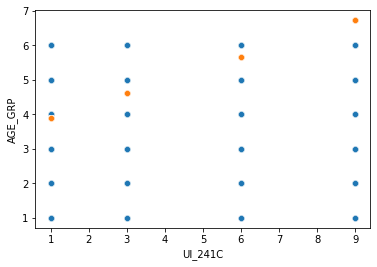

In [20]:
sns.scatterplot(data=df_train,x="UI_241C",y="AGE_GRP") # observed age
sns.scatterplot(data=df_train,x="UI_241C",y="age_pred") # predicted age

##Logistic Regression:

I left AGE_GRP_1 (youngest, 15-24yr olds) out of this model to vary it by them.

In [24]:
#split the data into training and testing (80/20 split)
df_train2, df_test2 = sk.model_selection.train_test_split(df_tech, test_size=0.20)

In [26]:
#define model parameters
log_reg_sur = smf.logit('AC_160A ~ AGE_GRP_2 + AGE_GRP_3 + AGE_GRP_4 + AGE_GRP_5 + AGE_GRP_6', data=df_train2)

#fit the model to the training data
results_sur = log_reg_sur.fit()

#Get a summary of the model parameters
print(results_sur.summary())

Optimization terminated successfully.
         Current function value: 0.324756
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                AC_160A   No. Observations:                11048
Model:                          Logit   Df Residuals:                    11042
Method:                           MLE   Df Model:                            5
Date:                Thu, 05 Aug 2021   Pseudo R-squ.:                  0.1613
Time:                        23:27:54   Log-Likelihood:                -3587.9
converged:                       True   LL-Null:                       -4277.8
Covariance Type:            nonrobust   LLR p-value:                3.156e-296
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.2287      0.356    -11.874      0.000      -4.927      -3.531
AGE_GRP_2      0.0365      0.

## <font color='lightblue'>5. Measure performance</font>

**Action:** Use your testing dataset to estimate the performance of your model. Add text describing what kind of measure you used. *Marks: 2*

##Linear Regression:

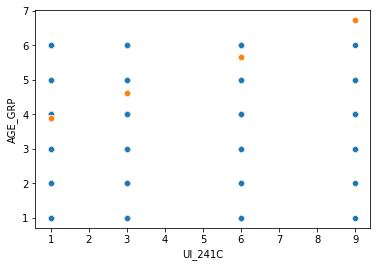

In [21]:
sns.scatterplot(data=df_test,x="UI_241C",y="AGE_GRP") # observed age
sns.scatterplot(data=df_test,x="UI_241C",y="age_pred") # predicted age

In [22]:
#mean squared error
mse_train = sk.metrics.mean_squared_error(df_train['AGE_GRP'], df_train['age_pred']) 

print(" Mean squared error = ", mse_train)

 Mean squared error =  2.0263722694255746


In [23]:
#mean squared error
mse_test = sk.metrics.mean_squared_error(df_test['AGE_GRP'], df_test['age_pred']) 

print(" Mean squared error = ", mse_test)

 Mean squared error =  2.028266364197034


##Logistic Regression:

In [35]:
#let's first predict values in the testing dataset
df_test2['tech_use_prob2'] = results_sur.predict(df_test2).round(2)

df_test2['tech_use_pred2'] = (df_test2['tech_use_prob2']>0.2).astype(int) # 0.25 is the threshold of tech use

df_test2.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,PUMFID,PROVINCE,LUC_RST,ABOSTAT,G_EDUC,HSDSIZEC,GENDER,HCOMP,LAN_Q01,EMP,DGI_Q05,BPR_Q16,AC_160A,AC_170A,AC_170B,AC_170C,AC_170E,AC_170F,AC_170G,AC_170H,AC_180A,AC_190A,AC_190B,AC_190C,AC_190D,AC_G190F,AC_G190I,AC_190J,AC_190K,AC_190L,AC_200A,AC_200B,AC_200C,AC_200D,AC_200E,AC_200F,AC_200G,AC_200H,UI_210A,UI_220A,UI_220B,UI_220C,UI_220D,UI_220E,UI_220F,UI_220G,UI_230A,UI_230B,UI_230C,UI_230D,UI_230E,UI_230F,UI_230G,UI_230H,UI_230I,UI_241A,UI_241B,UI_241C,UI_241D,UI_241E,UI_241F,UI_241G,UI_241H,UI_242A,UI_242B,UI_242C,UI_242D,UI_242E,UI_243A,UI_243B,UI_243C,UI_243D,UI_243E,UI_243F,UI_243G,UI_243H,UI_243I,UI_243J,UI_244A,UI_244B,UI_244C,UI_244D,UI_244E,UI_245A,UI_245B,UI_245C,UI_245D,UI_245E,UI_245F,UI_245G,UI_245H,UI_245I,UI_250A,UI_250B,UI_250C,UI_250D,UI_250E,UI_250F,UI_250G,UI_250H,UI_260A,SM_270A,SM_280A,SM_280B,SM_280C,SM_280E,SM_280F,SM_290A,SM_290B,SM_290C,SM_290D,SM_290E,SM_300A,SM_300B,SM_300C,SM_300D,SM_300E,SM_300F,SM_300G,SM_300H,SM_300I,SM_300J,SM_300K,SN_310A,SN_310B,SN_320A,SN_320B,SN_320C,SN_G320F,SN_320G,SN_330A,SN_330B,SN_330C,SN_330D,SN_330E,SN_330F,SN_330G,SN_330H,SN_340A,SN_340B,SN_340C,SN_340D,SN_340E,SN_340H,SN_340I,SN_G340J,SN_340K,SN_340L,GV_350A,GV_350B,GV_350C,GV_350D,GV_350E,GV_350F,GV_350G,GV_350H,GV_350I,GV_350J,GV_350K,GV_350L,GV_360A,GV_360B,GV_360C,GV_360D,GV_370A,GV_370B,GV_370C,GV_370D,GV_380A,GV_380B,GV_380C,GV_380D,GV_380E,GV_380F,GV_380G,GV_380H,GV_390A,GV_390B,GV_390D,GV_390F,GV_390G,GV_390H,GV_390I,CC_400A,CC_400B,CC_400C,CC_400D,CC_410A,CC_420A,CC_420B,CC_420C,CC_420D,CC_430A,CC_430B,CC_430C,CC_430D,CC_430E,SP_440A,SP_440B,SP_440C,SP_440D,SP_440E,SP_440F,SP_440G,SP_440H,SP_450A,SP_450B,SP_450C,SP_450D,SP_450E,SP_450F,SP_450G,SP_450H,SP_450I,SP_450J,SP_450K,SP_460A,SP_460B,SP_460C,SP_460D,SP_460E,SP_460F,SP_460G,SP_460H,SP_460I,SP_460J,SP_460K,SP_470A,SP_470B,SP_470C,SP_470D,SP_480A,SP_480B,SP_480C,SP_480D,DS_490A,DS_490B,DS_490C,DS_490D,DS_490E,DS_490F,DS_490G,DS_500A,DS_500B,DS_500C,DS_500D,DS_500E,DS_500F,DS_500G,DS_500H,DS_500I,DS_510A,DS_510B,DS_510C,DS_510D,DS_510E,DS_510F,DS_510G,DS_510H,DS_510I,DS_520A,DS_520B,DS_520C,DS_520D,DS_520E,DS_520F,DS_520G,DS_520H,EC_530A,EC_530B,EC_530C,EC_530D,EC_530E,EC_530F,EC_530G,EC_530H,EC_530I,EC_530J,EC_530K,EC_530L,EC_540A,EC_540B,EC_540C,EC_540D,EC_540E,EC_540F,EC_540G,EC_540H,EC_540I,EC_540J,EC_540K,EC_540X,EC_550A,EC_550B,EC_550C,EC_550D,EC_550E,EC_550F,EC_550G,EC_550H,EC_550I,EC_550J,EC_550K,EC_550L,EC_550M,EC_550N,EC_550O,EC_560A,EC_560B,EC_560C,EC_560D,EC_560E,EC_560F,EC_560G,EC_570A,EC_590A,EC_590B,EC_590C,EC_600A,EC_600B,EC_600C,EC_610A,EC_610B,EC_610C,EC_610D,EC_610E,EC_610F,EC_610G,EC_610H,EC_620A,EC_640A,EC_640B,EC_640C,EC_640D,EC_640E,EC_640F,EC_640G,EC_640I,EC_650A,EC_650B,EC_650C,EC_650D,EC_650E,EC_650F,EC_650G,EC_650H,EC_650I,EC_650J,EC_660A,EC_660B,EC_660C,EC_660D,EC_670A,EC_670B,EC_670C,EC_670D,EC_670E,EC_670F,EC_670G,EC_670H,EC_670I,EC_680A,EC_680B,EC_680C,EC_680D,EC_680E,EC_680F,EC_680G,EC_690A,EC_690B,EC_690C,EC_690D,EC_690E,EC_690F,EC_690G,EC_690H,EC_690I,EC_690J,EC_690K,EC_690L,EC_700A,EC_700B,EC_700C,EC_700F,EC_700G,EC_700H,EC_700I,OW_710A,OW_720A,OW_730A,OW_740A,OW_740B,OW_740C,OW_750A,OW_750B,OW_750D,OW_750G,OW_760A,OW_760D,OW_G770A,HA_780A,HA_780B,HA_780C,HA_780D,HA_780E,HA_780F,HA_780G,HA_780H,HA_780I,HA_780J,HA_780K,HA_780L,HA_790A,HINCQUIN,AVGEXP_N,EARN_INC,NON_SHOP,ONL_SHOP,CYB_INC,VS_USER,GV_USER,SN_REGUS,SN_USER,SM_USER,WTPM,WRPM1,WRPM2,WRPM3,WRPM4,WRPM5,WRPM6,WRPM7,WRPM8,WRPM9,WRPM10,WRPM11,WRPM12,WRPM13,WRPM14,WRPM15,WRPM16,WRPM17,WRPM18,WRPM19,WRPM20,WRPM21,WRPM22,WRPM23,WRPM24,WRPM25,WRPM26,WRPM27,WRPM28,WRPM29,WRPM30,WRPM31,WRPM32,WRPM33,WRPM34,WRPM35,WRPM36,WRPM37,WRPM38,WRPM39,WRPM40,WRPM41,WRPM42,WRPM43,WRPM44,WRPM45,WRPM46,WRPM47,WRPM48,WRPM49,WRPM50,WRPM51,WRPM52,WRPM53,WRPM54,WRPM55,WRPM56,WRPM57,WRPM58,WRPM59,WRPM60,WRPM61,WRPM62,WRPM63,WRPM64,WRPM65,WRPM66,WRPM67,WRPM68,WRPM69,WRPM70,WRPM71,WRPM72,WRPM73,WRPM74,WRPM75,WRPM76,WRPM77,WRPM78,WRPM79,WRPM80,WRPM81,WRPM82,WRPM83,WRPM84,WRPM85,WRPM86,WRPM8

In [36]:
df_test2.tech_use_pred2.head(5)

9825     1
7621     1
2524     1
10646    1
4352     0
Name: tech_use_pred2, dtype: int64

In [38]:
df_test2.tech_use_prob2.head(20)

9825     0.30
7621     0.30
2524     0.30
10646    0.30
4352     0.01
11255    0.10
7975     0.30
5041     0.06
4969     0.06
5139     0.06
1101     0.02
306      0.30
6246     0.30
5669     0.02
9077     0.10
3969     0.30
3518     0.10
9575     0.01
5436     0.10
13571    0.30
Name: tech_use_prob2, dtype: float64

In [41]:
sample = df_test2.tech_use_prob2 > 0.3
sample.sum()

0

In [42]:
sample1 = df_test2.tech_use_prob2 > 0.29
sample1.sum()

879

Text(33.0, 0.5, 'True label')

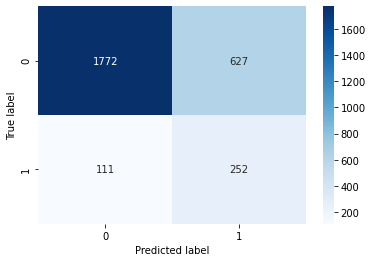

In [46]:
confusion_matrix_sur = sk.metrics.confusion_matrix(df_test2['AC_160A'], df_test2['tech_use_pred2'])
sns.heatmap(confusion_matrix_sur, annot=True,cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [47]:
print('Accuracy: {:.2f}'.format(sk.metrics.accuracy_score(df_test2['AC_160A'], df_test2['tech_use_pred2'])))
print('Precision: {:.2f}'.format(sk.metrics.precision_score(df_test2['AC_160A'], df_test2['tech_use_pred2'])))
print('Recall: {:.2f}'.format(sk.metrics.recall_score(df_test2['AC_160A'], df_test2['tech_use_pred2'])))

Accuracy: 0.73
Precision: 0.29
Recall: 0.69


I ran a linear regression and a logistic regression but given the heavy categorical nature of the data I think a decision tree would work better to analyze the data.

## <font color='lightblue'>6. Discussion and interpretation</font>

**Q1:** 
> What have you learnt about the ability to model and predict your variable of interest? *Marks: 1*

> What variables are responsible for the predictive ability of your model, and what does your model suggest about the relationships these variables have with your target variable? (i.e., think magnitude and sign of each effect). *Marks: 2*

> How did these relationships generalize to the with-held sample (i.e., testing data sample)? *Marks: 1*

Modelling and predicting variables of interest is really useful for figuring out whether a given relationship actually occurs, and in the social sciences it helps to predict how people may think of act in society.


For my model, the age of a person has a weak positive correlation with their internet use. My model attempts to predict, based on age, how likely someone will be to use the Internet, as well as use the Internet specificlaly for social purposes. The model suggests that there is a relationship but that it isn't very strong.


The relationships generalized very well to the testing sample, and I think this is due to the sample size being very large (13000+ respondents). It is interesting to see that the Govt of Canada uses each respondent to represent a certain percentage of the Canadian population. These are the WTPM variables and WRPM are bootstrapped versions of the weighting data.

## <font color='lightblue'>Extra: Build a Decision tree model and extra logistic regressions</font>



In [72]:
#Feature Scaling (after spliting the data!)
from sklearn.preprocessing import OrdinalEncoder 

#numeric variables
target_names = ['AGE_GRP']

#create the standard scaler object
ordinal_encoder = OrdinalEncoder()

#use this object to fit (i.e., to calculate the mean and sd of each variable in the training data) and then to transform the training data
df_tech[target_names] = ordinal_encoder.fit_transform(df_tech[target_names])

#take a look
df_tech

,PUMFID,PROVINCE,LUC_RST,ABOSTAT,G_EDUC,HSDSIZEC,GENDER,AGE_GRP,HCOMP,LAN_Q01,EMP,DGI_Q05,BPR_Q16,AC_170A,AC_170B,AC_170C,AC_170E,AC_170F,AC_170G,AC_170H,AC_180A,AC_190A,AC_190B,AC_190C,AC_190D,AC_G190F,AC_G190I,AC_190J,AC_190K,AC_190L,AC_200A,AC_200B,AC_200C,AC_200D,AC_200E,AC_200F,AC_200G,AC_200H,UI_210A,UI_220A,...,WRPM961,WRPM962,WRPM963,WRPM964,WRPM965,WRPM966,WRPM967,WRPM968,WRPM969,WRPM970,WRPM971,WRPM972,WRPM973,WRPM974,WRPM975,WRPM976,WRPM977,WRPM978,WRPM979,WRPM980,WRPM981,WRPM982,WRPM983,WRPM984,WRPM985,WRPM986,WRPM987,WRPM988,WRPM989,WRPM990,WRPM991,WRPM992,WRPM993,WRPM994,WRPM995,WRPM996,WRPM997,WRPM998,WRPM999,WRPM1000
0,100000.0,48.0,1.0,3.0,2.0,1.0,2.0,2.0,3.0,1.0,1.0,3.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,4.0,1.0,...,5850.24859,2575.81186,4101.47780,2508.55762,6184.70528,2790.05878,0.00000,2808.92815,0.00000,0.00000,0.00000,0.00000,2457.45374,0.00000,2235.92299,0.00000,2217.71084,2206.77439,0.00000,4830.79859,6431.03620,0.00000,0.00000,2266.55762,2156.35778,7149.30447,3415.20912,2873.47439,0.00000,2181.94038,0.00000,2278.03569,6043.52574,0.00000,2267.01329,2136.04619,2213.52209,5869.57769,2365.75576,0.00000
1,100001.0,47.0,2.0,3.0,1.0,1.0,1.0,4.0,3.0,1.0,1.0,3.0,2.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,3.0,3.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,...,0.00000,0.00000,0.00000,0.00000,840.39677,514.74834,0.00000,546.36573,1496.13965,1930.70973,613.04946,0.00000,502.71999,615.25353,1105.91170,0.00000,1961.58494,0.00000,1975.60766,588.58199,0.00000,0.00000,0.00000,0.00000,587.36955,0.00000,0.00000,1352.36455,676.40579,893.75469,0.00000,449.22781,594.72037,871.92424,0.00000,1014.09571,519.42379,1138.34998,0.00000,0.00000
2,100002.0,24.0,1.0,3.0,3.0,1.0,1.0,4.0,3.0,3.0,1.0,3.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,3.0,3.0,1.0,3.0,1.0,3.0,3.0,2.0,1.0,...,0.00000,0.00000,0.00000,2788.67209,1339.67421,0.00000,0.00000,0.00000,3485.37170,0.00000,0.00000,1362.72722,1367.92980,2503.97189,2618.80421,0.00000,0.00000,0.00000,1230.27881,1294.42957,1397.63883,0.00000,1430.16845,2637.27013,1304.13891,2505.71047,1325.76979,0.00000,2693.93332,2868.91185,3378.79949,0.00000,0.00000,3824.49238,0.00000,1561.69225,1340.06611,2433.46893,0.00000,0.00000
3,100003.0,35.0,1.0,3.0,2.0,2.0,2.0,3.0,2.0,1.0,1.0,3.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,3.0,3.0,3.0,3.0,1.0,1.0,3.0,1.0,1.0,...,7365.33675,0.00000,4228.67584,0.00000,2055.80266,2301.29193,0.00000,2502.22833,0.00000,0.00000,2448.01036,0.00000,0.00000,0.00000,2271.14542,0.00000,4005.89485,2090.06373,6474.79504,0.00000,0.00000,0.00000,2310.56654,6416.71260,2921.97122,2813.83465,2176.02883,0.00000,0.00000,7754.79640,0.00000,0.00000,2648.00651,2103.65635,2623.43870,2899.83892,4483.35935,7189.21065,2803.76127,2074.63095
4,100004.0,24.0,1.0,3.0,1.0,4.0,1.0,0.0,1.0,2.0,2.0,1.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,3.0,3.0,1.0,...,0.00000,12265.08729,0.00000,0.00000,6411.81007,26388.80775,0.00000,8830.78209,0.00000,20211.86496,16877.77787,10323.04651,0.00000,0.00000,10004.61363,0.00000,0.00000,8689.96397,0.00000,10946.55130,0.00000,0.00000,30313.19806,15895.82531,0.00000,7318.18988,0.00000,7360.38168,9802.24075,0.00000,26880.90844,12635.60625,0.00000,0.00000,7351.51481,0.00000,0.00000,0.00000,13822.13229,19306.99591
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13805,113805.0,13.0,2.0,3.0,1.0,2.0,1.0,5.0,2.0,2.0,2.0,3.0,2.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,1.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,...,0.00000,217.39648,299.69681,424.50902,216.63815,0.0000

In [76]:
pd.set_option('max_columns', None)
df_tech

PUMFID  PROVINCE  LUC_RST  ABOSTAT  G_EDUC  HSDSIZEC  GENDER  \
0      100000.0      48.0      1.0      3.0     2.0       1.0     2.0   
1      100001.0      47.0      2.0      3.0     1.0       1.0     1.0   
2      100002.0      24.0      1.0      3.0     3.0       1.0     1.0   
3      100003.0      35.0      1.0      3.0     2.0       2.0     2.0   
4      100004.0      24.0      1.0      3.0     1.0       4.0     1.0   
...         ...       ...      ...      ...     ...       ...     ...   
13805  113805.0      13.0      2.0      3.0     1.0       2.0     1.0   
13806  113806.0      46.0      1.0      3.0     3.0       4.0     1.0   
13807  113807.0      24.0      2.0      3.0     2.0       1.0     1.0   
13808  113808.0      35.0      1.0      3.0     2.0       2.0     2.0   
13809  113809.0      11.0      3.0      3.0     1.0       3.0     2.0   

       AGE_GRP  HCOMP  LAN_Q01  EMP  DGI_Q05  BPR_Q16  AC_170A  AC_170B  \
0          2.0    3.0      1.0  1.0      3.0      2.0      6.0      6.0   
1          4.0    3.0      1.0  1.0      3.0      2.0      3.0      3.0   
2          4.0    3.0      3.0  1.0      3.0      2.0      6.0      6.0   
3          3.0    2.0      1.0  1.0      3.0      1.0      6.0      6.0   
4          0.0    1.0      2.0  2.0      1.0      2.0      6.0      6.0   
...        ...    ...      ...  ...      ...      ...      ...      ...   
13805      5.0    2.0      2.0  2.0      3.0      2.0      6.0      6.0   
13806      2.0    1.0      1.0  1.0      3.0      1.0      6.0      6.0   
13807      3.0    3.0      3.0  1.0      3.0      2.0      6.0      6.0   
13808      4.0    2.0      1.0  2.0      3.0      2.0      6.0      6.0   
13809      5.0    2.0      1.0  2.0      3.0      2.0      6.0      6.0   

       AC_170C  AC_170E  AC_170F  AC_170G  AC_170H  AC_180A  AC_190A  AC_190B  \
0          6.0      6.0      6.0      6.0      6.0      1.0      6.0      6.0   
1          1.0      3.0      3.0      3.0      3.0      3.0      3.0      3.0   
2          6.0      6.0      6.0      6.0      6.0      1.0      6.0      6.0   
3          6.0      6.0      6.0      6.0      6.0      1.0      6.0      6.0   
4          6.0      6.0      6.0      6.0      6.0      1.0      6.0      6.0   
...        ...      ...      ...      ...      ...      ...      ...      ...   
13805      6.0      6.0      6.0      6.0      6.0      1.0      6.0      6.0   
13806      6.0      6.0      6.0      6.0      6.0      1.0      6.0      6.0   
13807      6.0      6.0      6.0      6.0      6.0      1.0      6.0      6.0   
13808      6.0      6.0      6.0      6.0      6.0      1.0      6.0      6.0   
13809      6.0      6.0      6.0      6.0      6.0      1.0      6.0      6.0   

       AC_190C  AC_190D  AC_G190F  AC_G190I  AC_190J  AC_190K  AC_190L  \
0          6.0      6.0       6.0       6.0      6.0      6.0      6.0   
1          1.0      1.0       3.0       3.0      3.0      3.0      3.0   
2          6.0      6.0       6.0       6.0      6.0      6.0      6.0   
3          6.0      6.0       6.0       6.0      6.0      6.0      6.0   
4          6.0      6.0       6.0       6.0      6.0      6.0      6.0   
...        ...      ...       ...       ...      ...      ...      ...   
13805      6.0      6.0       6.0       6.0      6.0      6.0      6.0   
13806      6.0      6.0       6.0       6.0      6.0      6.0      6.0   
13807      6.0      6.0       6.0       6.0      6.0      6.0      6.0   
13808      6.0      6.0       6.0       6.0      6.0      6.0      6.0   
13809      6.0      6.0       6.0       6.0      6.0      6.0      6.0   

       AC_200A  AC_200B  AC_200C  AC_200D  AC_200E  AC_200F  AC_200G  AC_200H  \
0          3.0      3.0      3.0      3.0      1.0      1.0      1.0      3.0   
1          6.0      6.0      6.0      6.0      6.0      6.0      6.0      6.0   
2          1.0      3.0      3.0      1.0      3.0      1.0      3.0      3.0   
3          1.0      3.0      3.0      3.0    

This doesn't seem to be working, possibly because the categorical variables are already coded. I will try a multi-regression model instead.

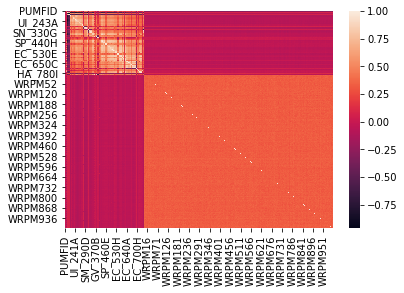

In [77]:
#run a correlation on all combinations of variables in df_flights
corrmat = df_tech.corr()

#plot the results as a heat map
sns.heatmap(corrmat, square=False)

In [ ]:
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df_tech.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_tech.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

np.random.seed(124)
df_tech = pd.DataFrame(np.random.rand(7, 10), columns=[*'abcdefghij'])

plt.figure(figsize=(16, 6))
corr = df_tech.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
cut_off = 0.6  # only show cells with abs(correlation) at least this value
extreme_1 = 0.75  # show with a star
extreme_2 = 0.85  # show with a second star
extreme_3 = 0.90  # show with a third star
mask |= np.abs(corr) < cut_off
corr = corr[~mask]  # fill in NaN in the non-desired cells

remove_empty_rows_and_cols = True
if remove_empty_rows_and_cols:
    wanted_cols = np.flatnonzero(np.count_nonzero(~mask, axis=1))
    wanted_rows = np.flatnonzero(np.count_nonzero(~mask, axis=0))
    corr = corr.iloc[wanted_cols, wanted_rows]

annot = [[f"{val:.4f}"
          + ('' if abs(val) < extreme_1 else '\n★')  # add one star if abs(val) >= extreme_1
          + ('' if abs(val) < extreme_2 else '★')  # add an extra star if abs(val) >= extreme_2
          + ('' if abs(val) < extreme_3 else '★')  # add yet an extra star if abs(val) >= extreme_3
          for val in row] for row in corr.to_numpy()]
heatmap = sns.heatmap(corr, vmin=-1, vmax=1, annot=annot, fmt='', cmap='BrBG')
plt.show()

In [25]:
#1. build the model (define model parameters, and the training data to be used)
multi_linear_reg = smf.ols(formula='AGE_GRP ~ UI_241A + UI_241B + UI_241C + UI_241D + UI_241E + UI_241F + UI_241G + UI_241H', data=df_train) #use training data

#2. fit the model to the training data
results_social = multi_linear_reg.fit() 

#3. Predict values in the testing dataset
df_test['age_pred_social'] = results_social.predict(df_test) #predict on testing data

#Get a summary of the model parameters
print(results_social.summary()) 

                            OLS Regression Results                            
Dep. Variable:                AGE_GRP   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.225
Method:                 Least Squares   F-statistic:                     401.8
Date:                Thu, 05 Aug 2021   Prob (F-statistic):               0.00
Time:                        22:25:54   Log-Likelihood:                -19189.
No. Observations:               11048   AIC:                         3.840e+04
Df Residuals:                   11039   BIC:                         3.846e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.8356      0.074     52.113      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [28]:
#1. build the model (define model parameters, and the training data to be used)
multi_linear_reg_two = smf.ols(formula='GENDER ~ UI_241A + UI_241B + UI_241C + UI_241D + UI_241E + UI_241F + UI_241G + UI_241H', data=df_train) #use training data

#2. fit the model to the training data
results_social_two = multi_linear_reg_two.fit() 

#3. Predict values in the testing dataset
df_test['age_pred_social_two'] = results_social_two.predict(df_test) #predict on testing data

#Get a summary of the model parameters
print(results_social_two.summary()) 

                            OLS Regression Results                            
Dep. Variable:                 GENDER   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     30.25
Date:                Thu, 05 Aug 2021   Prob (F-statistic):           2.91e-47
Time:                        22:29:09   Log-Likelihood:                -7884.4
No. Observations:               11048   AIC:                         1.579e+04
Df Residuals:                   11039   BIC:                         1.585e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2940      0.026     48.915      0.0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
